<a href="https://colab.research.google.com/github/anuragb1090/JH_CustomerSegmentation/blob/master/000_JH_CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %%time

# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

Saving Test_LqhgPWU.csv to Test_LqhgPWU.csv
Saving Train_aBjfeNk.csv to Train_aBjfeNk.csv
User uploaded file "Test_LqhgPWU.csv" with length 133098 bytes
User uploaded file "Train_aBjfeNk.csv" with length 425369 bytes
CPU times: user 339 ms, sys: 49.9 ms, total: 389 ms
Wall time: 48.6 s


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
train = pd.read_csv('/content/Train_aBjfeNk.csv')
test = pd.read_csv('/content/Test_LqhgPWU.csv')

print('Train shape:{},{}'.format(train.shape[0], train.shape[1]))
print('Test shape:{},{}'.format(test.shape[0], test.shape[1]))

Train shape:8068,11
Test shape:2627,10


In [ ]:
train.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
test.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

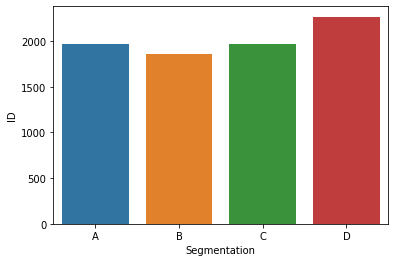

In [ ]:
tmp = train.groupby(['Segmentation'])['ID'].count().reset_index()
sns.barplot(x='Segmentation', y='ID', data=tmp)

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=55)

X = train.copy()
y = X[['Segmentation']]
X.drop(['ID', 'Segmentation'], inplace=True, axis=1)
X.fillna('None', inplace=True)

cat_features = ['Gender', 'Ever_Married', 'Graduated', 'Profession',
                'Spending_Score', 'Var_1']

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
pred_X = pd.DataFrame()
pred_y = pd.DataFrame()

for idx, (tr_idx, val_idx) in enumerate(skf.split(X, y)):
  print('*'*20)
  print('Iteration#: {}'.format(idx+1))

  cat_params = {
        'iterations' : 1000
      , 'learning_rate' : 0.1
      , 'depth' : 6
      , 'eval_metric' : 'Accuracy'
      , 'cat_features' : cat_features
      , 'early_stopping_rounds' : 200
  }
  model = CatBoostClassifier(**cat_params)

  X_tr, y_tr, X_val, y_val = X.iloc[tr_idx], y.iloc[tr_idx], \
                              X.iloc[val_idx], y.iloc[val_idx]

  model.fit(X=X_tr, y=y_tr, eval_set=[(X_val, y_val)], verbose=50)

  pred_X = pd.concat([pred_X, X_val], axis=0)
  pred_y = pd.concat([pred_y, y_val], axis=0)





********************
Iteration#: 1
0:	learn: 0.4764487	test: 0.5130112	best: 0.5130112 (0)	total: 96.6ms	remaining: 1m 36s
50:	learn: 0.5556244	test: 0.5433705	best: 0.5446097 (43)	total: 2.07s	remaining: 38.5s
100:	learn: 0.5839789	test: 0.5458488	best: 0.5495663 (95)	total: 4.04s	remaining: 35.9s
150:	learn: 0.6072203	test: 0.5520446	best: 0.5532838 (140)	total: 6.14s	remaining: 34.5s
200:	learn: 0.6268980	test: 0.5545229	best: 0.5582404 (181)	total: 8.21s	remaining: 32.6s
250:	learn: 0.6445615	test: 0.5594796	best: 0.5625774 (243)	total: 10.3s	remaining: 30.7s
300:	learn: 0.6608305	test: 0.5514250	best: 0.5625774 (243)	total: 12.4s	remaining: 28.9s
350:	learn: 0.6789588	test: 0.5532838	best: 0.5625774 (243)	total: 14.6s	remaining: 27s
400:	learn: 0.6944531	test: 0.5539033	best: 0.5625774 (243)	total: 16.8s	remaining: 25s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.5625774473
bestIteration = 243

Shrink model to first 244 iterations.
********************
Iter